<a href="https://colab.research.google.com/github/yamare1/ISBA4790-Cumulative-Assignment-1/blob/main/Copy_of_Cumulative_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Cumulative Assignment 1: Machine Learning with Python
This is the INDIVIDUAL assignment for ISBA 4790- Machine Learning with Python. The assignment is due by **Tuesday February 20 at 11:50 AM**. Your submissions will be examined by [TurnItIn](https://en.wikipedia.org/wiki/Turnitin) for plaigiarism. If you use any piece of code from web or anywhere else, you should add the reference or link to your conversation with GenAI as a comment right where you are using the code. **Use of GenAI is limited to only troubleshooting your code, not to create code for the problems.** You are not allowed to share your work or talk about this assignment with each other.

## The Business Case
A commercially successful movie not only entertains audience, but also enables film companies to gain tremendous profit. A lot of factors such as good directors, experienced actors are considerable for creating good movies. However, famous directors and actors can always bring an expected box-office income but cannot guarantee a highly rated imdb score.

## Data Description
The dataset is from Kaggle website. You may download [the dataset here](https://drive.google.com/file/d/1lQ6VmIygkSnukT-hwFFuu3CTCiGFVhhF/view?usp=sharing). It contains 28 variables for about 5K movies, spanning across 100 years in over 60 countries. There are over 2K unique director names, and thousands of actors/actresses.

* **movie_title**	Title of the Movie
* **duration**	Duration in minutes
* **director_name**	Name of the Director of the Movie
* **director_facebook_likes**	Number of likes of the Director on his Facebook Page
* **actor_1_name**	Primary actor starring in the movie
* **actor_1_facebook_likes**	Number of likes of the Actor_1 on his/her Facebook Page
* **actor_2_name**	Other actor starring in the movie
* **actor_2_facebook_likes**	Number of likes of the Actor_2 on his/her Facebook Page
* **actor_3_name**	Other actor starring in the movie
* **actor_3_facebook_likes**	Number of likes of the Actor_3 on his/her Facebook Page
* **num_user_for_reviews**	Number of users who gave a review
* **num_critic_for_reviews**	Number of critical reviews on imdb
* **num_voted_users**	Number of people who voted for the movie
* **cast_total_facebook_likes**	Total number of facebook likes of the entire cast of the movie
* **movie_facebook_likes**	Number of Facebook likes in the movie page
* **plot_keywords**	Keywords describing the movie plot
* **facenumber_in_poster**	Number of the actor who featured in the movie poster
* **color**	Film colorization. ‘Black and White’ or ‘Color’
* **genres**	Film categorization like ‘Animation’, ‘Comedy’, ‘Romance’, ‘Horror’, ‘Sci-Fi’, ‘Action’, ‘Family’
* **title_year**	The year in which the movie is released (1916:2016)
* **language**	English, Arabic, Chinese, French, German, Danish, Italian, Japanese etc
* **country**	Country where the movie is produced
* **content_rating**	Content rating of the movie
* **aspect_ratio**	Aspect ratio the movie was made in
* **movie_imdb_link**	IMDB link of the movie
* **gross**	Gross earnings of the movie in Dollars
* **budget**	Budget of the movie in Dollars
* **imdb_score**	IMDB Score of the movie on IMDB

## Problem Steps
Please go through the following problems and produce the code that answers the problem.
* Properly comment your code so it is easy to read and understand.
* If you use any piece of code from web, you should add the reference or link to your conversation with GenAI as a comment right where you are using the code.
* When finished, save the notebook, and download it in .ipynb file format. You submit the notebook file on the Brightspace.

## Data Ingestion & Cleaning
1. Read the dataset into a dataframe. Use [.head()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html#pandas.DataFrame.head) to check out the first few rows and use [.describe()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html#pandas.DataFrame.describe)to see a summary statistics of the dataset.



In [ ]:
import pandas as pd
df = pd.read_csv('IMDB Dataset.csv')
df.head()
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

2. There are some duplicate rows of data. Use [.drop_duplicate()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html#pandas.DataFrame.drop_duplicates) to remove the duplicates. Make sure you print out the number of records (movies) in the dataset before and after duplicate removal.

In [ ]:
len(df)

5043

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
len(df)

4998

3. Drop the movies with missing values. Print the number of movies left.

In [ ]:
len(df)

4998

In [ ]:
df.isna().sum()

color                         19
director_name                103
num_critic_for_reviews        49
duration                      15
director_facebook_likes      103
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        874
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                152
movie_imdb_link                0
num_user_for_reviews          21
language                      14
country                        5
content_rating               301
budget                       487
title_year                   107
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 327
movie_facebook_likes           0
dtype: int64

In [ ]:
df.dropna(inplace = True)

In [ ]:
len(df)

3722

##Data Preparation

4. Add two new columns to the dataset; one including the profit and another the ROI (Return on Investement) for each movie. We assume only half the gross revenue goes to the producer and the other half to the movie theaters and others. So, consider profit = gross/2 - budget and ROI = (profit/budget)*100.

In [ ]:
df['profit'] = (df['gross'] / 2) - df['budget']
df['ROI'] = (df['profit'] / df['budget']) * 100

5. Add another column that calculated a new quality rating for the movies. The new rating called "imdb_quality" would be the imdb_score multiplied by the num_user_for_reviews. We susspect this may be a better predictor of movie success.


In [ ]:
df['imdb_quality'] = df['imdb_score'] * df['num_user_for_reviews']

6. Create five dummy/boolean variables as five new columns to the dataframe. The column names would be Action, Crime, Drama, Documentary, Romance. Action column should be True for any movie if 'Action' is inside its genres. That would be the case for other genre columns like Crime, Drama, etc. If you like, you can add more columns for other genres.

In [ ]:
for genre in ['Action', 'Crime', 'Drama', 'Documentary', 'Romance']:
    df[genre] = df.genres.str.contains(genre)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3722 entries, 0 to 5042
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      3722 non-null   object 
 1   director_name              3722 non-null   object 
 2   num_critic_for_reviews     3722 non-null   float64
 3   duration                   3722 non-null   float64
 4   director_facebook_likes    3722 non-null   float64
 5   actor_3_facebook_likes     3722 non-null   float64
 6   actor_2_name               3722 non-null   object 
 7   actor_1_facebook_likes     3722 non-null   float64
 8   gross                      3722 non-null   float64
 9   genres                     3722 non-null   object 
 10  actor_1_name               3722 non-null   object 
 11  movie_title                3722 non-null   object 
 12  num_voted_users            3722 non-null   int64  
 13  cast_total_facebook_likes  3722 non-null   int64  
 1

7. Create a new boolean column  called "profitable" that specifies if the movie was profitable. We consider any movie as profitable if it has an ROI of 10 percent and over. In other words, the column should be True if the movie's ROI is equal or more than 10, and it should be False otherwise.

In [ ]:
df['ROI']

0          60.444272
1         -48.432641
2         -59.168536
3         -10.373872
5         -86.147387
            ...     
5026     1411.188889
5027     3268.900000
5033     2934.000000
5035    14478.000000
5042     3773.727273
Name: ROI, Length: 3722, dtype: float64

In [ ]:
df['profitable'] = df['ROI'] >= 10.000000
df['profitable']

0        True
1       False
2       False
3       False
5       False
        ...  
5026     True
5027     True
5033     True
5035     True
5042     True
Name: profitable, Length: 3722, dtype: bool

8. Use One-Hot encoding to convert the content_rating variable to dummy variables, so we can feed it to ML algorithms. Drop the "NC-17" and "Unrated" and "Not Rated" dummy columns, because there are not many movies with those ratings.

In [ ]:
df['content_rating'].info()

<class 'pandas.core.series.Series'>
Index: 3722 entries, 0 to 5042
Series name: content_rating
Non-Null Count  Dtype 
--------------  ----- 
3722 non-null   object
dtypes: object(1)
memory usage: 58.2+ KB


In [ ]:
df = pd.get_dummies(df, columns = ['content_rating']).drop(['content_rating_Not Rated','content_rating_Unrated','content_rating_NC-17'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3722 entries, 0 to 5042
Data columns (total 45 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      3722 non-null   object 
 1   director_name              3722 non-null   object 
 2   num_critic_for_reviews     3722 non-null   float64
 3   duration                   3722 non-null   float64
 4   director_facebook_likes    3722 non-null   float64
 5   actor_3_facebook_likes     3722 non-null   float64
 6   actor_2_name               3722 non-null   object 
 7   actor_1_facebook_likes     3722 non-null   float64
 8   gross                      3722 non-null   float64
 9   genres                     3722 non-null   object 
 10  actor_1_name               3722 non-null   object 
 11  movie_title                3722 non-null   object 
 12  num_voted_users            3722 non-null   int64  
 13  cast_total_facebook_likes  3722 non-null   int64  
 1

##Data Exploration & Visualization


9. create a [line plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot) that displays two lines: a green dashed line for average gross earning over the years, and a red dotted line for average budget over the years. Add proper legend for the plot. Properly title the plot and label the axes.


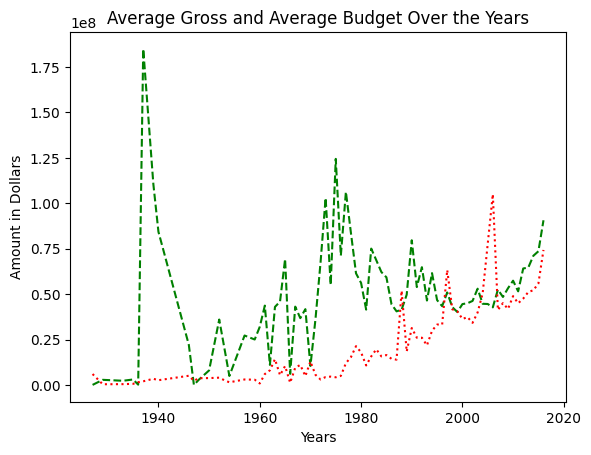

In [ ]:
import matplotlib.pyplot as plt
avg_gross = df.groupby('title_year')['gross'].mean()
avg_budget = df.groupby('title_year')['budget'].mean()
plt.plot(avg_gross.index, avg_gross, color = 'green', ls = 'dashed')
plt.plot(avg_budget.index, avg_budget, color = 'red', ls = 'dotted')
plt.title('Average Gross and Average Budget Over the Years')
plt.xlabel('Years')
plt.ylabel('Amount in Dollars')
plt.show()

##Modeling

10. Use [.select_dtypes()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html) to drop the non-numerical (object) variables from the dataset (Boolean variables are considered numerical in Python, and can be used in models).
* Create a decision tree model to predict the "profitable" variable, and tune it using grid search for the best accuracy.
* Make sure to drop the 'profitable','roi','gross','profit' variables from the predictive dataset (X) because they are we calculated 'profitable' from them.
* Use train and test datasets (with random_state =20) and compare their accuracy to make sure you are not over-fitting.
* Print the train and test accuracy rate, plot the tree for your best model.
* Briefly exaplin one of the branches down to it leaf node.

In [ ]:
df = df.select_dtypes(exclude = 'object')

In [ ]:
y = df.profitable
X = df.drop(axis = 1, columns = ['profitable', 'ROI', 'gross', 'profit'])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20, stratify = y)

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

grid = {'max_depth' : [2, 3, 4, 5, 6, 7],
        'min_samples_leaf' : [0.008, 0.009, 0.01, 0.011, 0.012]}

cl = GridSearchCV(DecisionTreeClassifier(), param_grid = grid, cv = 20, n_jobs = -1)

cl.fit(X_train, y_train)

y_pred = cl.predict(X_train)

print('Best model parameters: ', cl.best_params_)

print('Train accuracy: ', cl.score(X_train, y_train).round(2))

print('Test set accuracy: ', cl.score(X_test, y_test))

Best model parameters:  {'max_depth': 6, 'min_samples_leaf': 0.008}
Train accuracy:  0.84
Test set accuracy:  0.8080536912751678


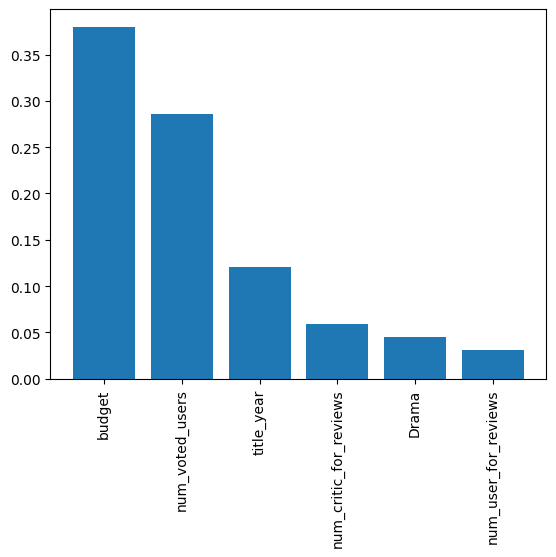

In [ ]:
# Features with the greatest impact on whether a movie is profitable or not
import matplotlib.pyplot as plt
importances = pd.Series(cl.best_estimator_.feature_importances_, index = X.columns).sort_values(ascending = False)[:6]

plt.bar(importances.index, height = importances)
plt.xticks(rotation = 90)
plt.show()

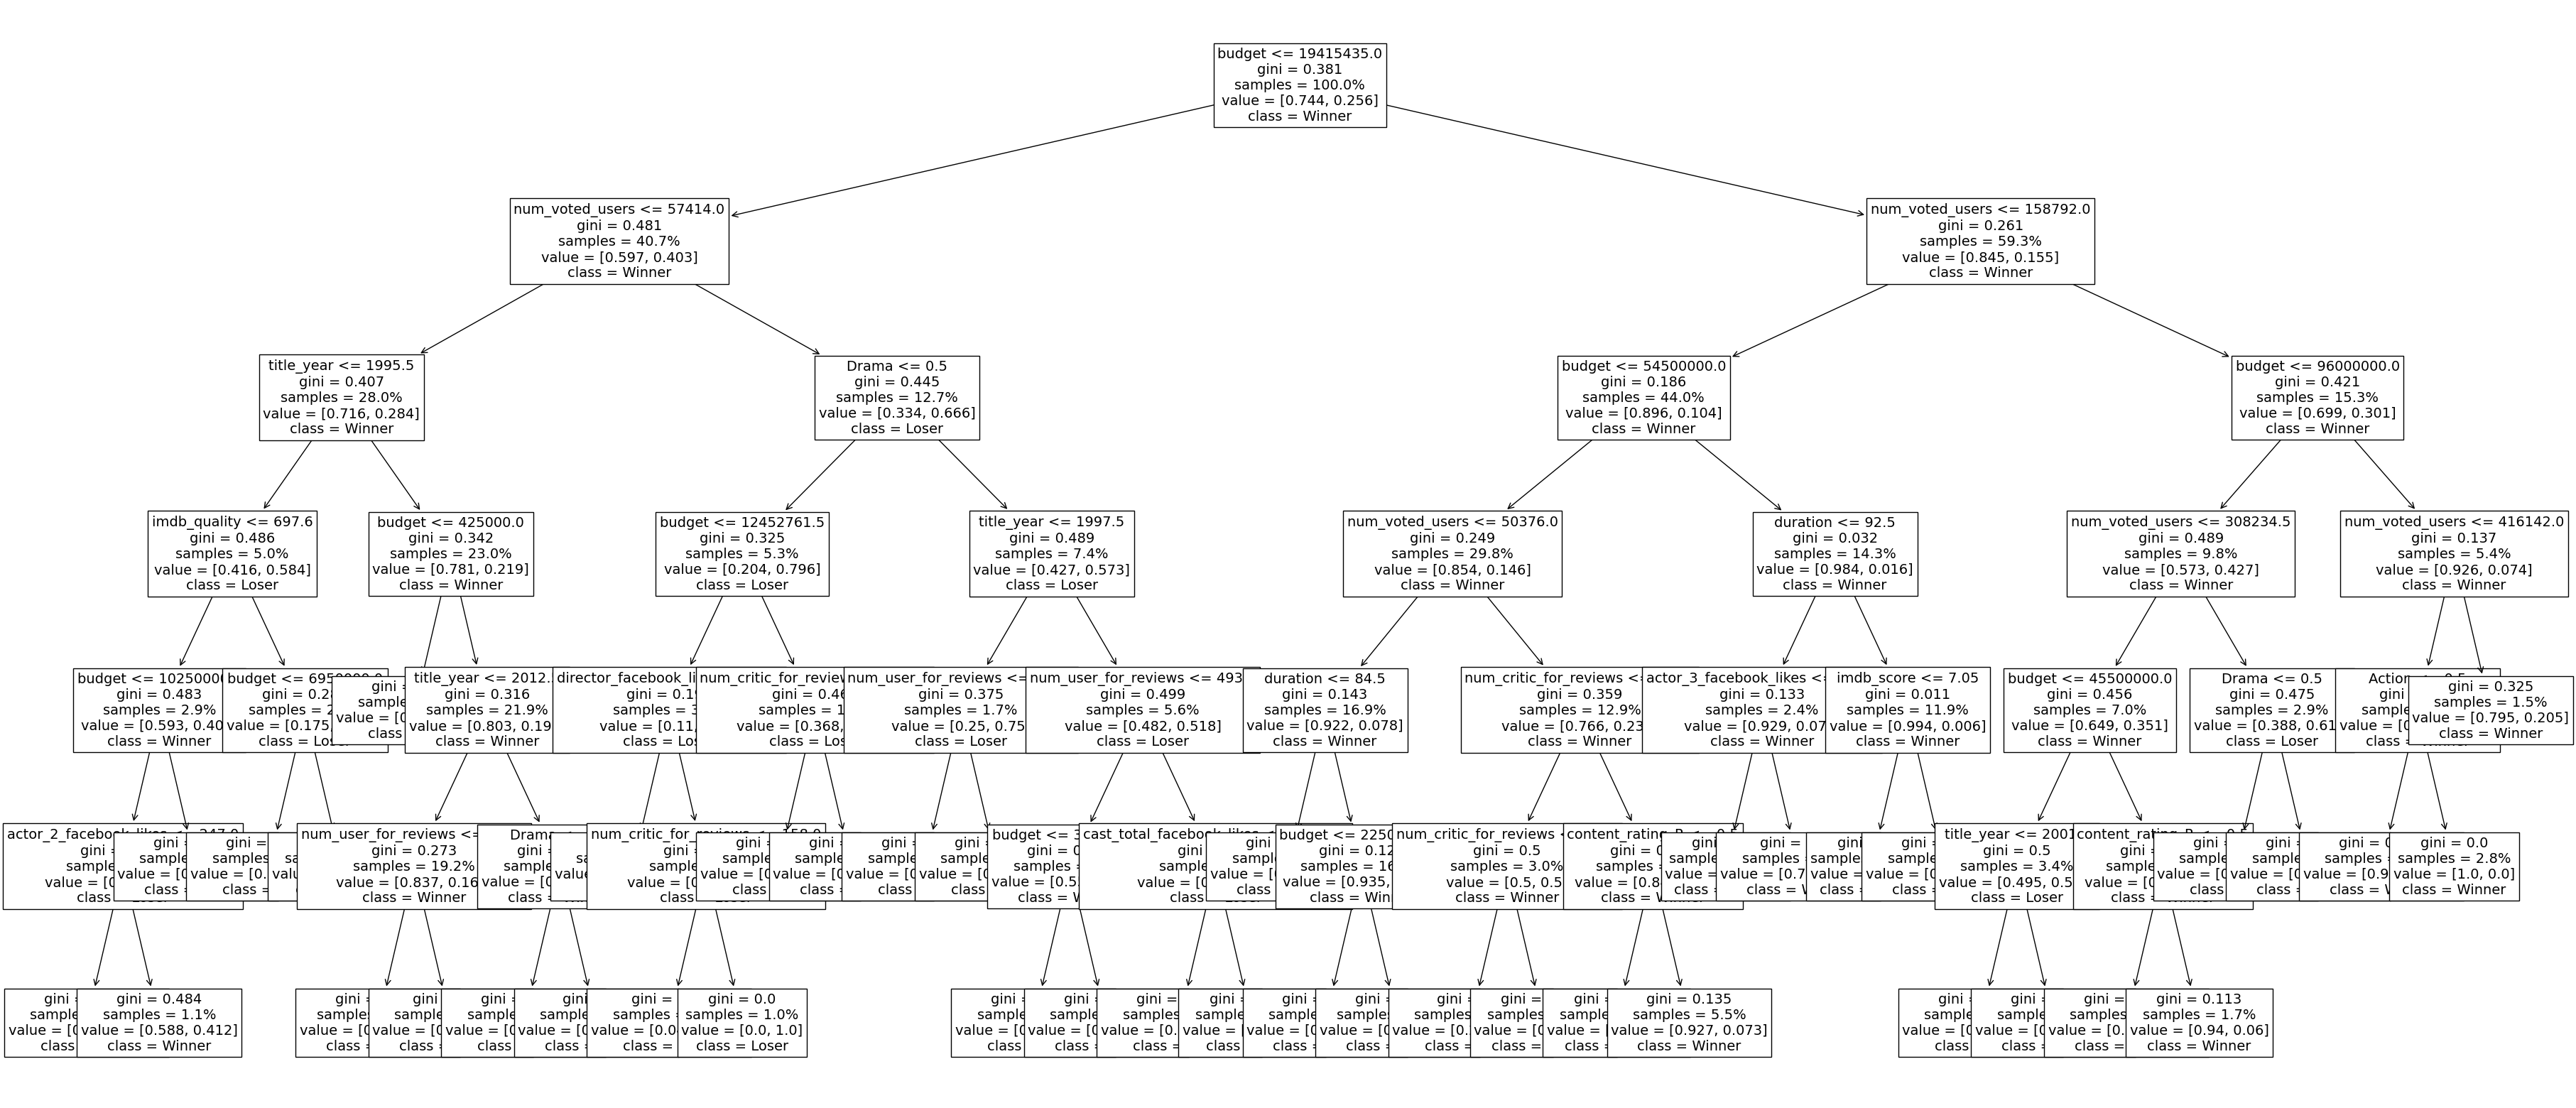

In [ ]:
plt.figure(figsize=(45, 20)) # Changing size of tree

plot_tree(cl.best_estimator_, feature_names = X_train.columns, class_names = ['Winner', 'Loser'], fontsize = 14,
          proportion = True)
plt.show()

# The tree starts at the parent node with the feature "budget" to predict profitability.
# If budget is NOT less than or equal to 19415435.0, then it moves on to the right node.
# This node has a gini impurity of 0.381 which means that the samples in the node are mixed.
# We want a lower impurity so when the sample reaches a node, there is no uncertainty in
# the prediction. 0.744 of the samples will be "Winner" (profitable) and 0.256 would be
# unprofitable. The class prediction is Winner so this is a confident prediction. If we
# highlight one path (no, yes, yes, no, no, no), we can see that each node uses less
# samples until it gets to the leaf node, which only needs 5.5% of samples to make a

# confident prediction that the movie is not profitable. 92.7% indicates that "Winner" is the
# majority predicted class for that node, and the gini impurity is very small at only 0.135.

11. Create Random Forest model to predict the 'profitable' variable, like the previous question, and tune it using gridsearch to get the best accuracy rate over the train and test datasets.
* You can use the same X and y datasets.
* Print the accuracy rates for your best model on train and test sets.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

grid = {'max_depth' : [5 ,6, 7, 8],
        'min_samples_leaf' : [0.01, 0.013, 0.015, 0.03, 0.04],
        'n_estimators' : [60, 100]}

rf = GridSearchCV(RandomForestClassifier(), param_grid = grid, cv = 10, n_jobs = -1)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_train)

print('Training set accuracy: ', rf.score(X_train, y_train))

print('Test set accuracy: ', rf.score(X_test, y_test))

print('Best model parameters: ', rf.best_params_)

Training set accuracy:  0.8128988915015116
Test set accuracy:  0.8026845637583893
Best model parameters:  {'max_depth': 8, 'min_samples_leaf': 0.01, 'n_estimators': 100}


12. Create **a ridge** AND **a lasso** regression model to predict "roi" variable, and tune it using grid search for best r2_score.
* Make sure to drop the 'profitable', 'roi', 'gross', 'profit' variables from the predictive dataset (X) because they are closely claculated in relation to 'roi'.
* Standardize X properly to take care of scale differences.
* Use train and test datasets and compare the accuracy among the two models (r2_score).
* Plot the coefficients to see which variables contribute most to movies' ROI. Briefly compare and explain the diffent results from the two regression models.
* Check for multicollinearity and plot the residuals to check for regression assumptions. Briefly comment whether the assumption are met.


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3722 entries, 0 to 5042
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   num_critic_for_reviews     3722 non-null   float64
 1   duration                   3722 non-null   float64
 2   director_facebook_likes    3722 non-null   float64
 3   actor_3_facebook_likes     3722 non-null   float64
 4   actor_1_facebook_likes     3722 non-null   float64
 5   num_voted_users            3722 non-null   int64  
 6   cast_total_facebook_likes  3722 non-null   int64  
 7   facenumber_in_poster       3722 non-null   float64
 8   num_user_for_reviews       3722 non-null   float64
 9   budget                     3722 non-null   float64
 10  title_year                 3722 non-null   float64
 11  actor_2_facebook_likes     3722 non-null   float64
 12  imdb_score                 3722 non-null   float64
 13  aspect_ratio               3722 non-null   float64
 1

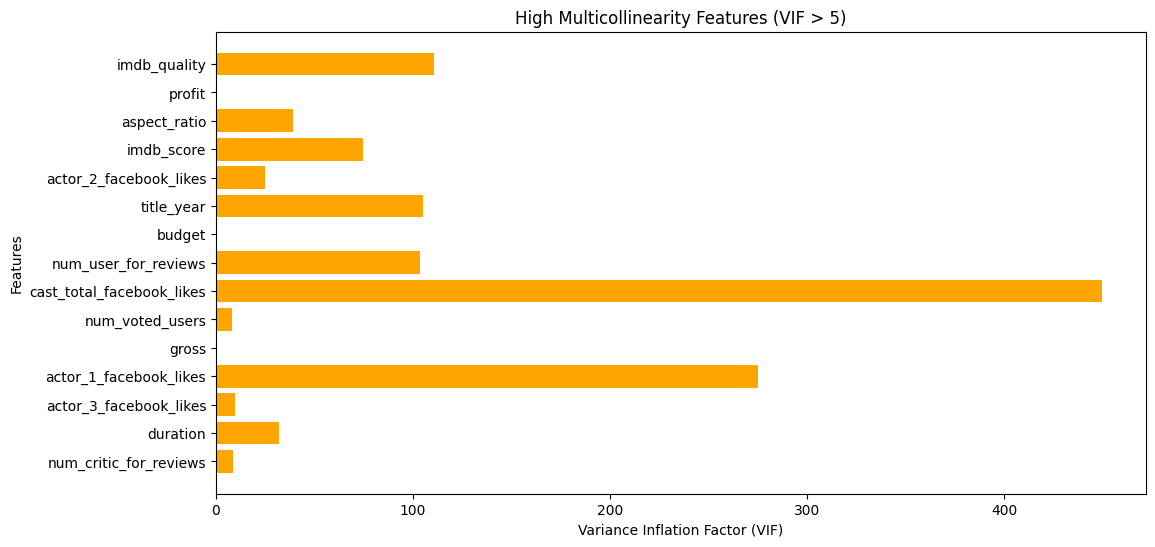

Features with high multicollinearity (VIF > 5):


,Feature,VIF
0,num_critic_for_reviews,8.464169
1,duration,32.226781
3,actor_3_facebook_likes,9.780167
4,actor_1_facebook_likes,274.861737
5,gross,inf
6,num_voted_users,8.171221
7,cast_total_facebook_likes,449.454861
9,num_user_for_reviews,103.491814
10,budget,inf
11,title_year,105.282333


In [ ]:
"""
Detects multicollinearity in a DataFrame and plots VIF values for each feature.

Parameters:
- X: Select features used to predict if movie is profitable
- threshold: VIF threshold for identifying features with high multicollinearity.
"""

from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def detect_and_plot_multicollinearity(X, threshold=5.0):

   # Need a numeric dataframe to calculate the VIF
    X_numeric = df.select_dtypes(include=[np.number])

    # Goes through each feature to calculate VIF
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X_numeric.columns
    vif_data["VIF"] = [variance_inflation_factor(X_numeric.values, i) for i in range(X_numeric.shape[1])]

    # Filter features with VIF over threshold
    high_vif_features = vif_data[vif_data["VIF"] > threshold]

    # Plotting VIF vals
    plt.figure(figsize=(12, 6))
    plt.barh(high_vif_features["Feature"], high_vif_features["VIF"], color='orange')
    plt.xlabel('Variance Inflation Factor (VIF)')
    plt.ylabel('Features')
    plt.title('High Multicollinearity Features (VIF > {:.0f})'.format(threshold))
    plt.show()

    print("Features with high multicollinearity (VIF > {:.0f}):".format(threshold))
    display(high_vif_features)

detect_and_plot_multicollinearity(X)


In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler

y = df.ROI
X = df.drop(['profitable','ROI','gross','profit'],axis=1)

# Dropping the highly correlated features
correlated = ['director_facebook_likes', 'actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes','cast_total_facebook_likes','num_user_for_reviews','movie_facebook_likes','imdb_quality']
X.drop(axis = 1, columns = correlated, inplace = True)

# Need to retrain and test for new target feature
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 20)

SS = StandardScaler()
#rb_scaler = RobustScaler()

X_train_scaled = SS.fit_transform(X_train)
X_test_scaled = SS.transform(X_test)
SS.fit_transform(X)

array([[ 4.50734242,  2.98679427,  5.15065145, ..., -0.02840191,
        -0.91049032, -0.05190342],
       [ 1.09407386,  2.58993248,  2.41254871, ..., -0.02840191,
        -0.91049032, -0.05190342],
       [ 3.52633174,  1.66392165,  1.12359819, ..., -0.02840191,
        -0.91049032, -0.05190342],
       ...,
       [-0.19502282, -1.46687689, -0.21732551, ..., -0.02840191,
        -0.91049032, -0.05190342],
       [-0.90037761, -1.29049388, -0.35314064, ..., -0.02840191,
         1.09830931, -0.05190342],
       [-1.00577545, -0.89363209, -0.66833151, ..., -0.02840191,
        -0.91049032, -0.05190342]])

Best parameters:  {'alpha': 10}
Ridge Train R2:  0.01
Ridge Test R2:  -0.014
Best parameters:  {'alpha': 10}
Lasso Train R2:  0.01
Lasso Test R2:  -0.012


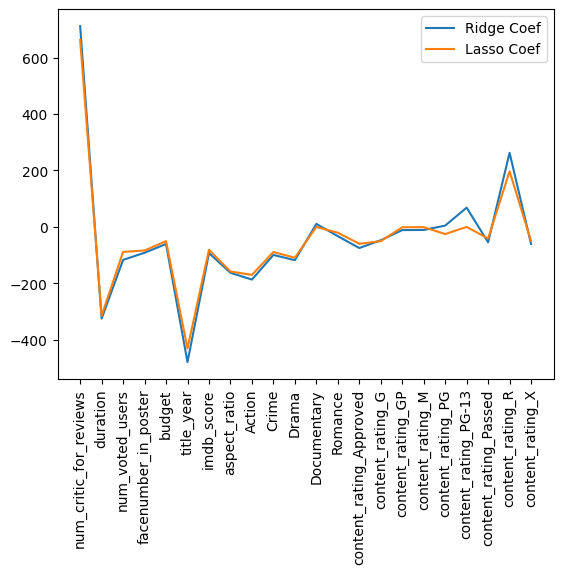

In [ ]:
from sklearn.linear_model import Ridge, Lasso


params = params = {'alpha': [0.01,0.1,1,0,10]
          }

rg = GridSearchCV(Ridge(), param_grid = params, cv=5)
ls = GridSearchCV(Lasso(),param_grid=params, cv=5)

rg.fit(X_train_scaled,y_train)
print('Best parameters: ', rg.best_params_)
print("Ridge Train R2: ",rg.score(X_train_scaled,y_train).round(3))
print("Ridge Test R2: ",rg.score(X_test_scaled,y_test).round(3))
plt.plot(X.columns,rg.best_estimator_.coef_,label = 'Ridge Coef')
plt.xticks(rotation=90)

ls.fit(X_train_scaled,y_train)
print('Best parameters: ', ls.best_params_)
print("Lasso Train R2: ",ls.score(X_train_scaled,y_train).round(3))
print("Lasso Test R2: ",ls.score(X_test_scaled,y_test).round(3))
plt.plot(X.columns,ls.best_estimator_.coef_, label = 'Lasso Coef')
plt.xticks(rotation=90)
plt.legend()
plt.show()

import warnings
warnings.filterwarnings("ignore")

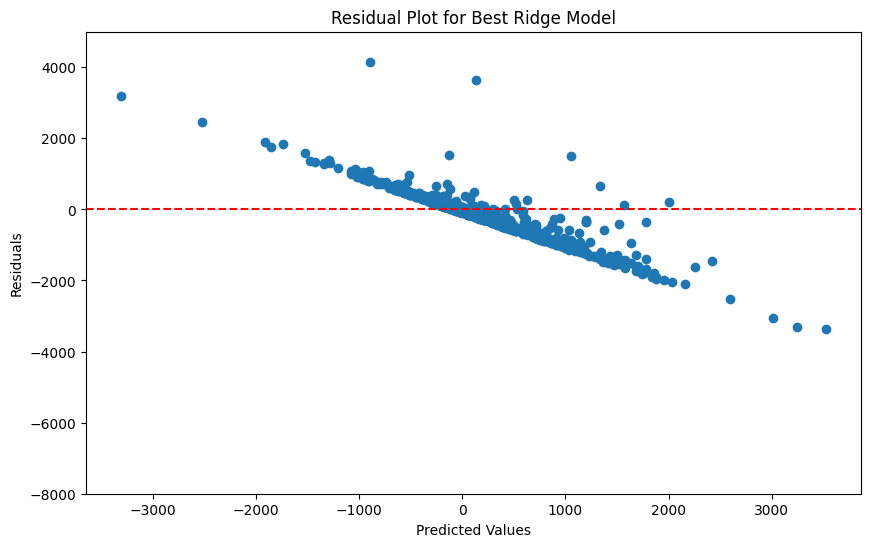

In [ ]:









# Check for multicollinearity
(X_test.corr().round(2).abs()>0.7).sum()

y_pred = rg.best_estimator_.predict(X_test_scaled)

# Calculate residuals
residuals = y_test - y_pred

# Plotting the residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.ylim(-8000, 5000)
plt.title('Residual Plot for Best Ridge Model')
plt.show()

# Residuals are not randomly distributed and have a clear decreasing pattern

In [ ]:
best_params = rg.best_estimator_.coef_
coefficient_names = df.drop(['profitable', 'ROI', 'gross', 'profit'], axis=1).columns

for name, coef in zip(coefficient_names, best_params):
    print(f"{name}: {coef}")

num_critic_for_reviews: 711.4399401588335
duration: -324.8612119748255
director_facebook_likes: -116.791667965476
actor_3_facebook_likes: -91.4697376182181
actor_1_facebook_likes: -60.51275666560642
num_voted_users: -478.88694821677836
cast_total_facebook_likes: -92.77313347828076
facenumber_in_poster: -162.43650009372388
num_user_for_reviews: -186.5257400501498
budget: -99.22834008360402
title_year: -117.86585835537937
actor_2_facebook_likes: 10.725884211780233
imdb_score: -32.71914685165994
aspect_ratio: -74.79766185473508
movie_facebook_likes: -47.14809753949756
imdb_quality: -11.204723300125249
Action: -10.781202860514647
Crime: 4.672696585610755
Drama: 68.3757639414737
Documentary: -54.5046948462777
Romance: 262.5832097644091
content_rating_Approved: -60.27713662791101
